In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from warnings import filterwarnings
filterwarnings('ignore')

READ THE DATA

In [6]:
df=pd.read_csv('bank_nifty.csv')
df

,Date,Open,High,Low,Close,Volume
0,1/1/2018,25565.75,25588.00,25271.55,25318.10,57576913
1,1/2/2018,25382.20,25425.50,25232.80,25338.25,72033811
2,1/3/2018,25425.75,25454.90,25300.90,25318.60,59730356
3,1/4/2018,25367.65,25490.35,25310.30,25462.60,105995860
4,1/5/2018,25524.45,25643.35,25499.55,25601.85,123622612
...,...,...,...,...,...,...
950,11/3/2021,40040.65,40160.20,39304.85,39402.05,267471244
951,11/4/2021,39669.10,39734.70,39514.15,39573.70,38771464
952,11/8/2021,39674.05,39674.05,38932.15,39438.25,212859120
953,11/9/2021,39517.85,39560.60,39223.40,39368.80,203521905


# EXPLORATORY DATA ANALYSIS

In [7]:
df.shape

(955, 6)

In [8]:
df.isnull().sum()

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

In [9]:
df = pd.read_csv('bank_nifty.csv', parse_dates = ['Date'], index_col = 'Date')
df

,Open,High,Low,Close,Volume
Date,,,,,
2018-01-01,25565.75,25588.00,25271.55,25318.10,57576913
2018-01-02,25382.20,25425.50,25232.80,25338.25,72033811
2018-01-03,25425.75,25454.90,25300.90,25318.60,59730356
2018-01-04,25367.65,25490.35,25310.30,25462.60,105995860
2018-01-05,25524.45,25643.35,25499.55,25601.85,123622612
...,...,...,...,...,...
2021-11-03,40040.65,40160.20,39304.85,39402.05,267471244
2021-11-04,39669.10,39734.70,39514.15,39573.70,38771464
2021-11-08,39674.05,39674.05,38932.15,39438.25,212859120


Text(0.5, 1.0, 'Correlation')

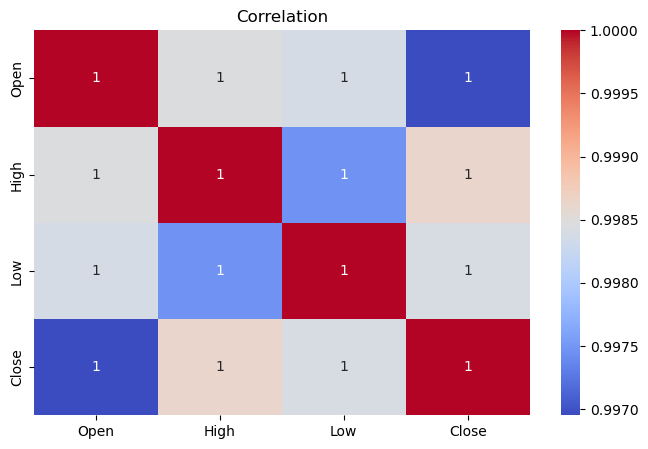

In [10]:
plt.figure(figsize=(8,5))
sns.heatmap(df.corr(),cmap='coolwarm',annot=True)
plt.title('Correlation')

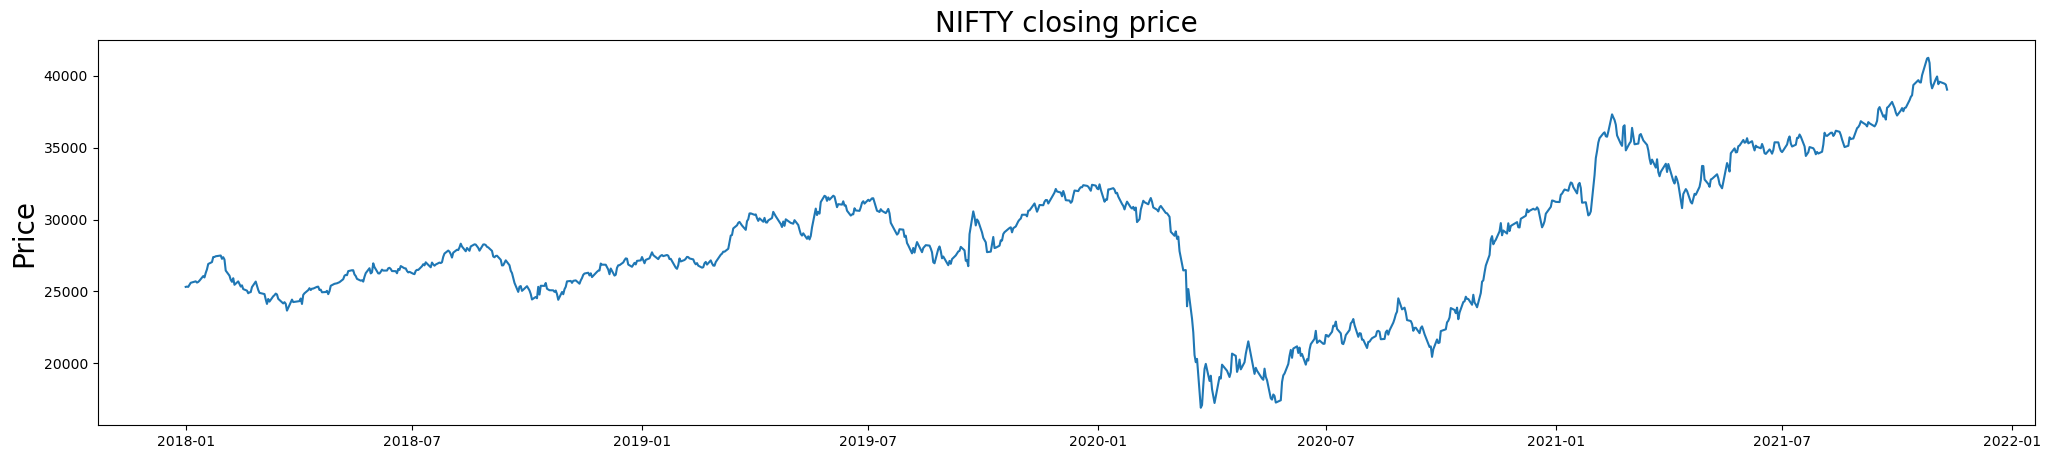

In [11]:
plt.figure(figsize=(25,5))
plt.plot(df['Close'])
plt.title('NIFTY closing price', fontsize=20)
plt.ylabel('Price', fontsize=20)
plt.show()

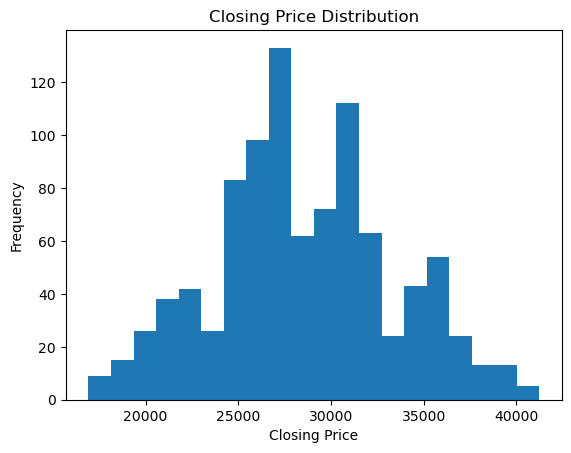

In [12]:
plt.hist(df['Close'], bins=20)
plt.xlabel('Closing Price')
plt.ylabel('Frequency')
plt.title('Closing Price Distribution')
plt.show()

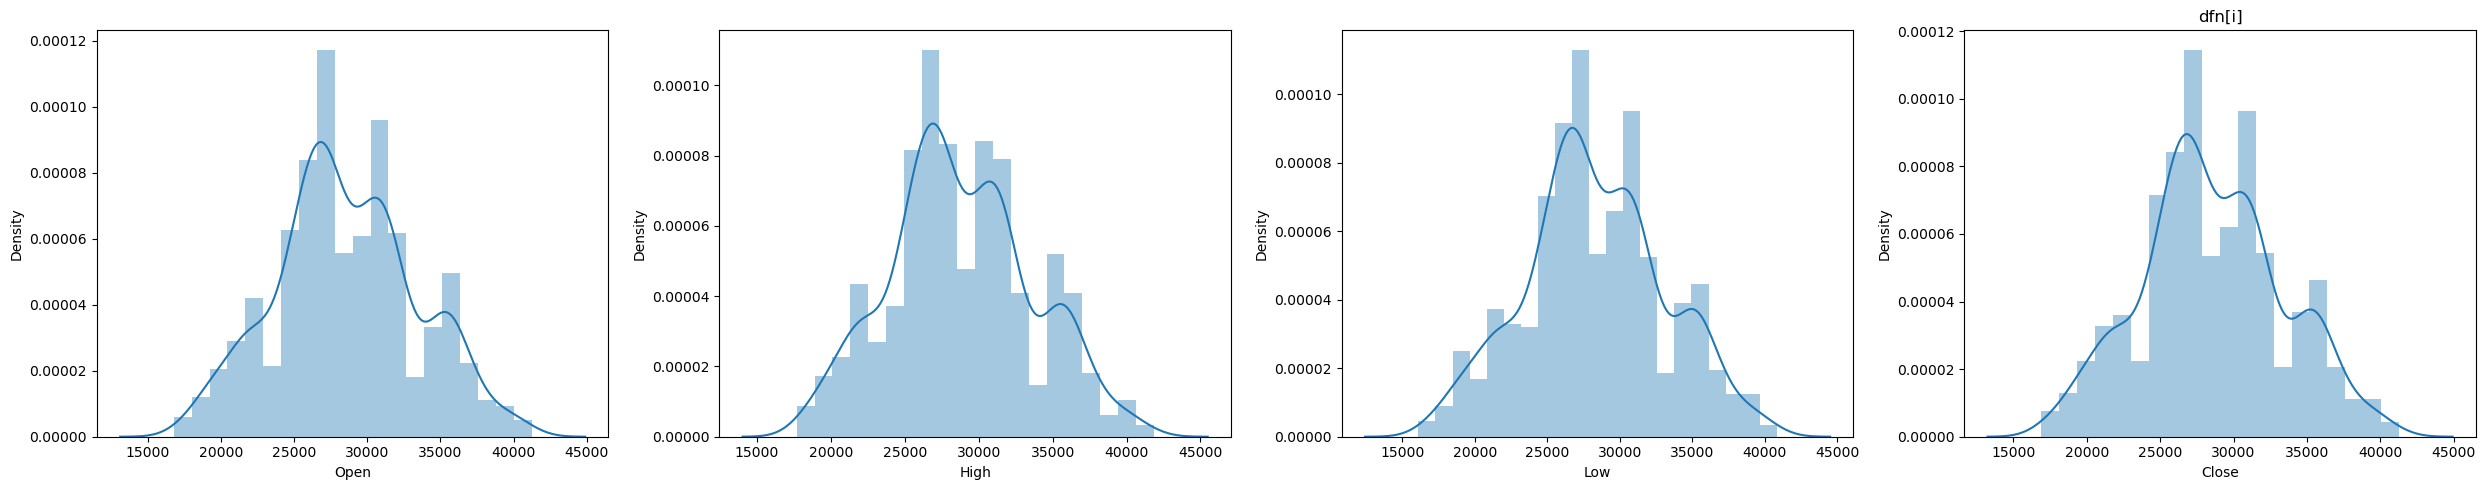

In [13]:
dfn= df.select_dtypes(include=np.number)
fig,ax= plt.subplots(1,4,figsize=(25,5))

for i,subplots in zip(dfn,ax):
    sns.distplot(dfn[i],ax=subplots)
    plt.title('dfn[i]')
plt.tight_layout()

In [14]:
df.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')

In [15]:
clns=['Open', 'High', 'Low', 'Close']

<Figure size 2500x600 with 0 Axes>

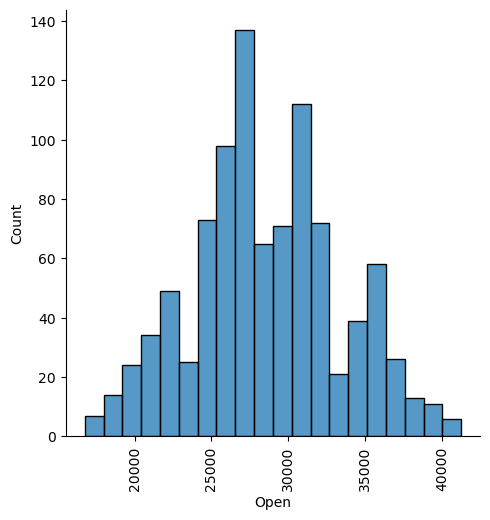

<Figure size 2500x600 with 0 Axes>

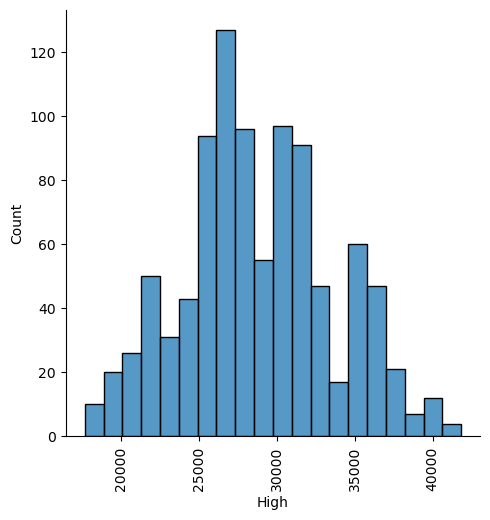

<Figure size 2500x600 with 0 Axes>

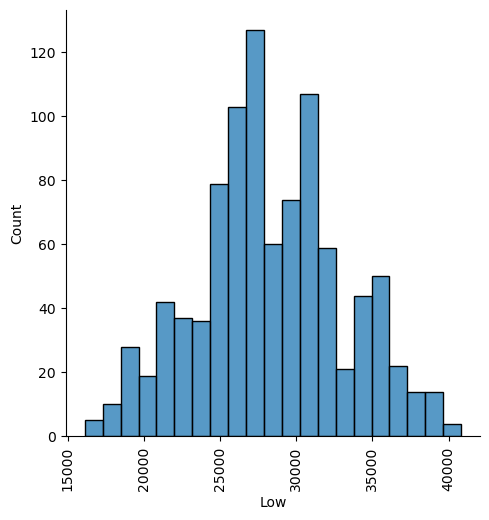

<Figure size 2500x600 with 0 Axes>

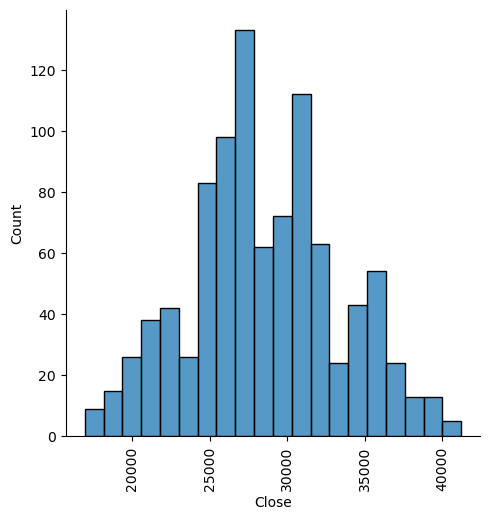

In [16]:
for cl in clns:
    plt.figure(figsize = (25,6))
    sns.displot(df[cl])
    plt.xticks(rotation=90)
    plt.show()

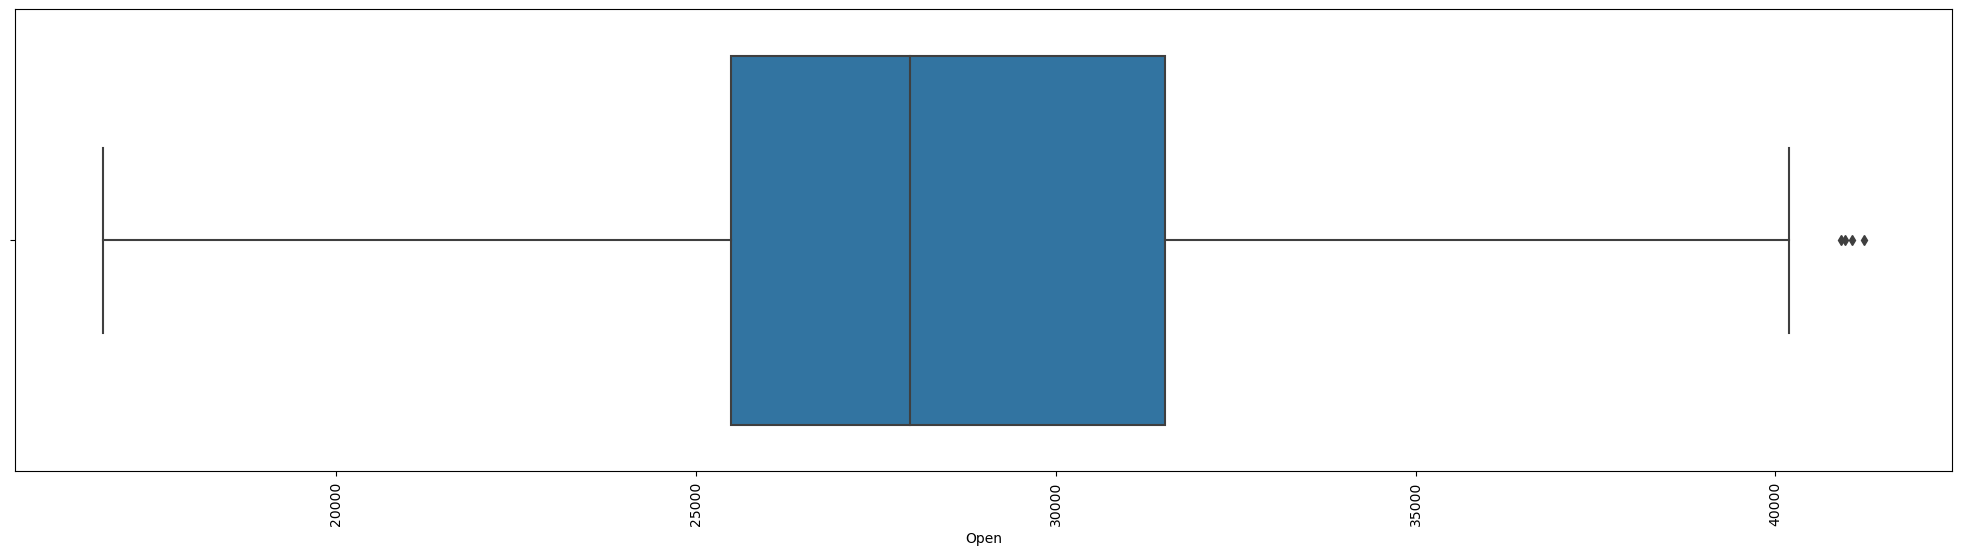

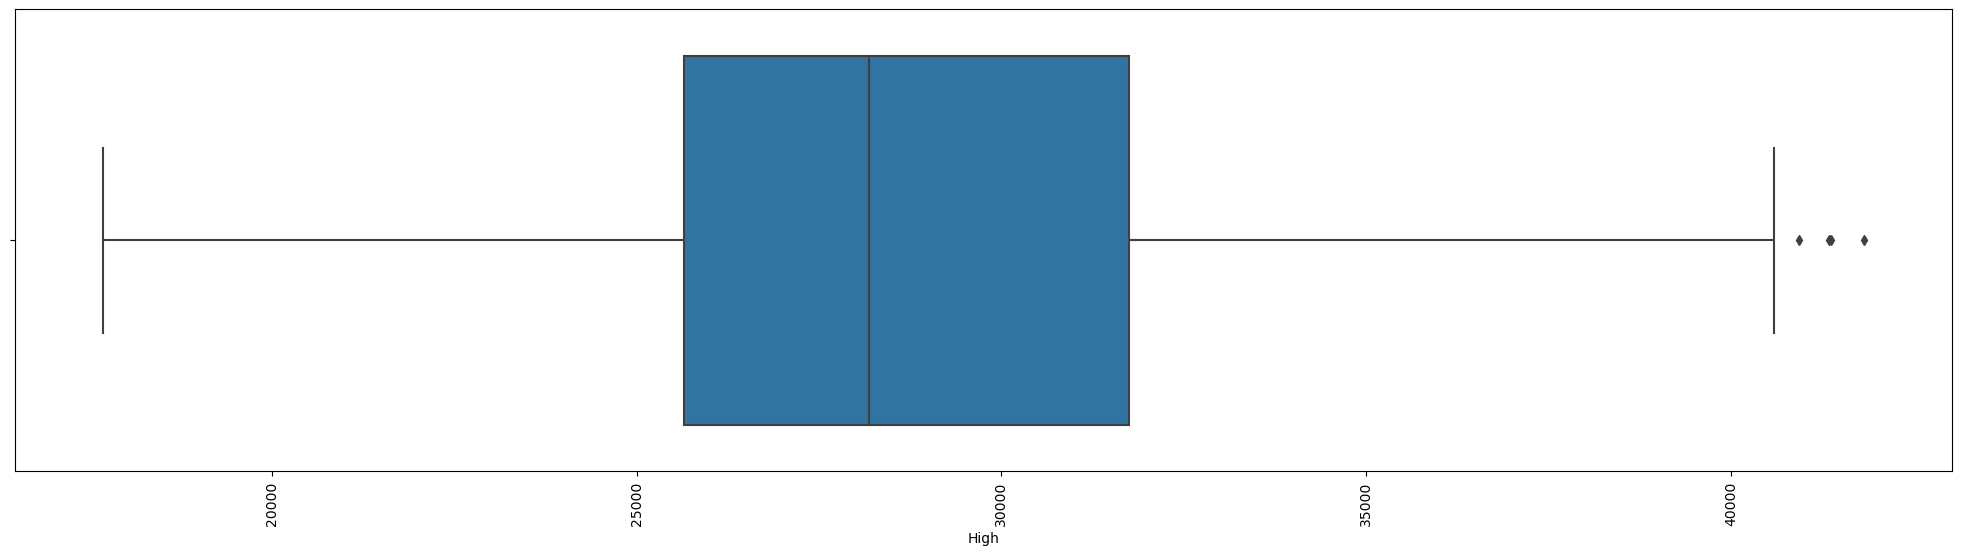

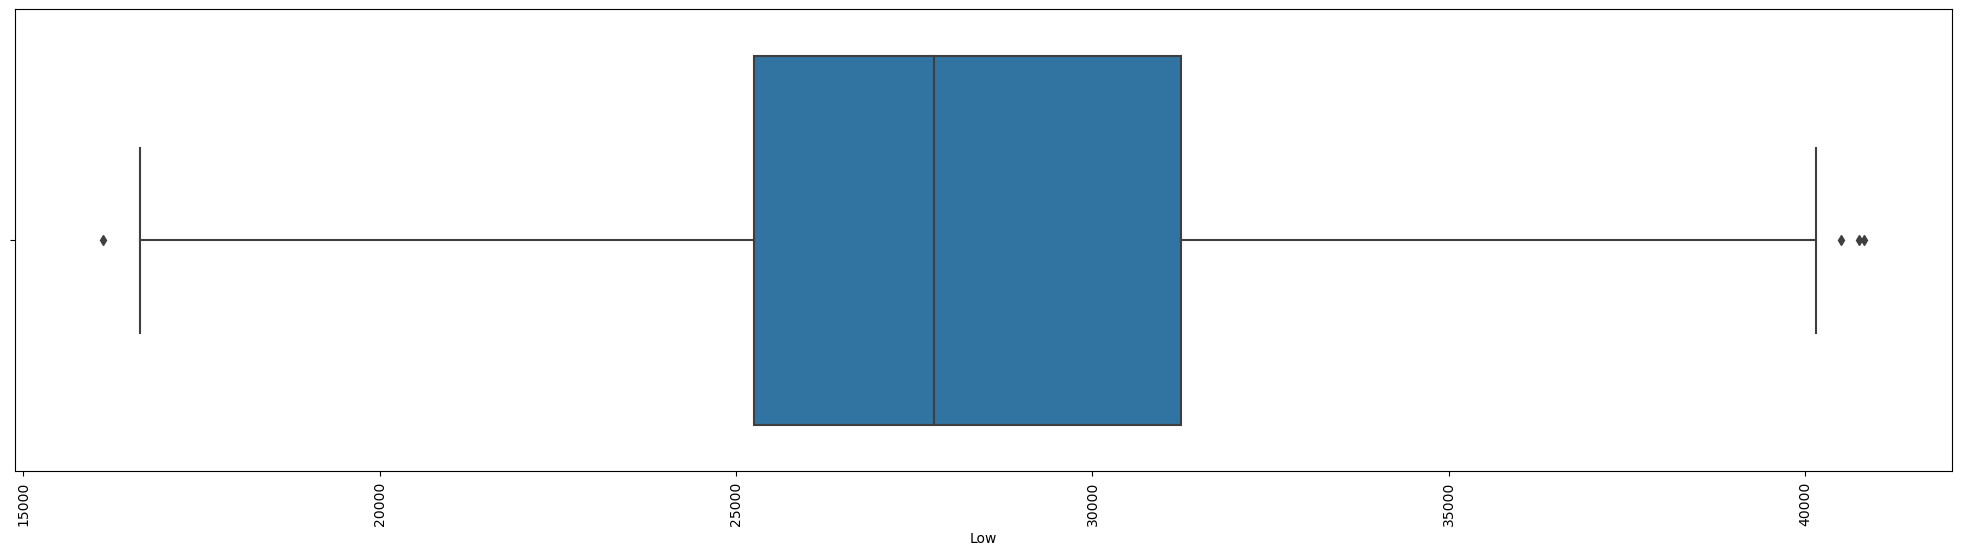

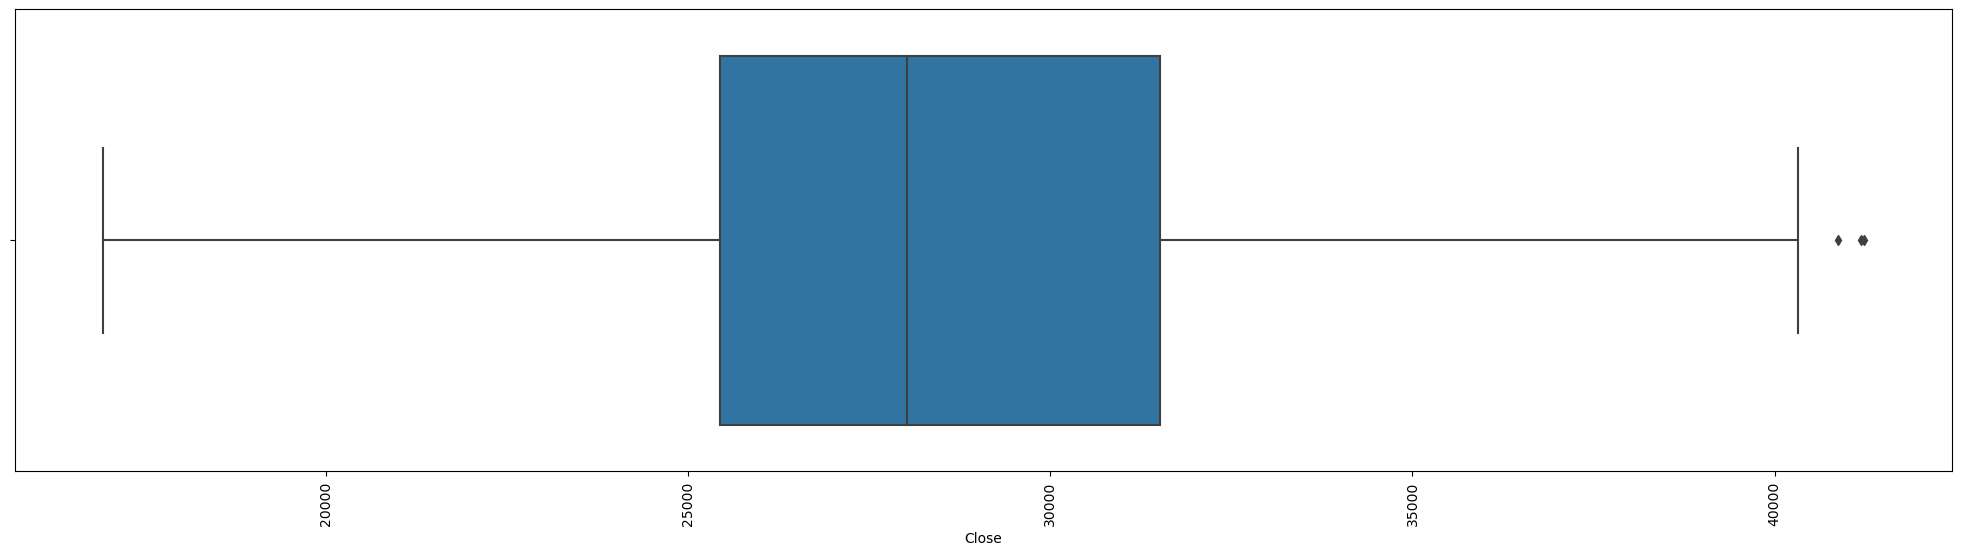

In [17]:
for cl in clns:
    plt.figure(figsize = (25,6))
    sns.boxplot(x = df[cl])
    plt.xticks(rotation=90)
    plt.show()

The consists some outliers

<AxesSubplot:xlabel='Date'>

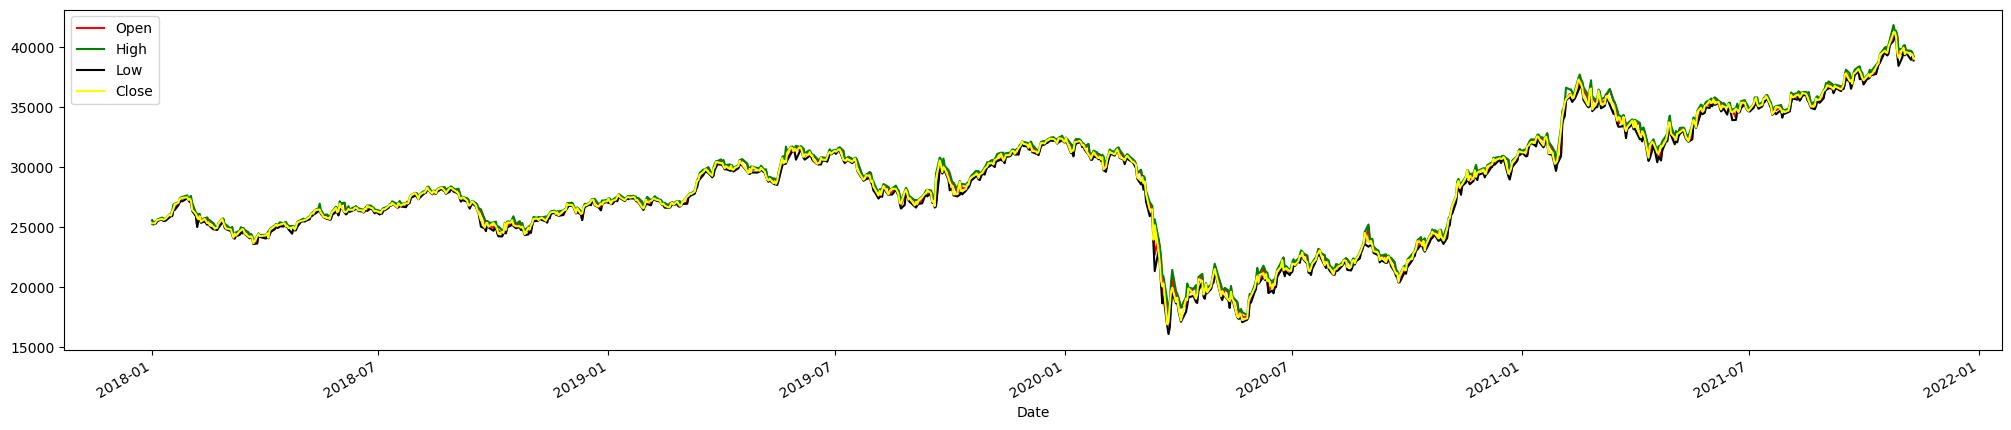

In [18]:
df.plot( y=['Open', 'High', 'Low', 'Close'], color=['red','green','black','yellow'], figsize=(25,5))

The Open, High, Low, Close values follow an almost similar pattern throughout the dates

In [19]:
df["Tommorow"] = df["Close"].shift(-1)
df

,Open,High,Low,Close,Volume,Tommorow
Date,,,,,,
2018-01-01,25565.75,25588.00,25271.55,25318.10,57576913,25338.25
2018-01-02,25382.20,25425.50,25232.80,25338.25,72033811,25318.60
2018-01-03,25425.75,25454.90,25300.90,25318.60,59730356,25462.60
2018-01-04,25367.65,25490.35,25310.30,25462.60,105995860,25601.85
2018-01-05,25524.45,25643.35,25499.55,25601.85,123622612,25676.10
...,...,...,...,...,...,...
2021-11-03,40040.65,40160.20,39304.85,39402.05,267471244,39573.70
2021-11-04,39669.10,39734.70,39514.15,39573.70,38771464,39438.25
2021-11-08,39674.05,39674.05,38932.15,39438.25,212859120,39368.80


We create a Tomorrow column which stores the close value of the next day

In [20]:
df.dropna(axis=0,inplace=True)

In [21]:
df['Target'] = (df['Tommorow'] > df['Close']).astype(int)
df

,Open,High,Low,Close,Volume,Tommorow,Target
Date,,,,,,,
2018-01-01,25565.75,25588.00,25271.55,25318.10,57576913,25338.25,1
2018-01-02,25382.20,25425.50,25232.80,25338.25,72033811,25318.60,0
2018-01-03,25425.75,25454.90,25300.90,25318.60,59730356,25462.60,1
2018-01-04,25367.65,25490.35,25310.30,25462.60,105995860,25601.85,1
2018-01-05,25524.45,25643.35,25499.55,25601.85,123622612,25676.10,1
...,...,...,...,...,...,...,...
2021-11-02,39796.90,40107.60,39590.70,39938.45,265000402,39402.05,0
2021-11-03,40040.65,40160.20,39304.85,39402.05,267471244,39573.70,1
2021-11-04,39669.10,39734.70,39514.15,39573.70,38771464,39438.25,0


We create a Target column which has values 1 and 0 to help us in making predictions

In [22]:
df.reset_index(inplace=True)
df

,Date,Open,High,Low,Close,Volume,Tommorow,Target
0,2018-01-01,25565.75,25588.00,25271.55,25318.10,57576913,25338.25,1
1,2018-01-02,25382.20,25425.50,25232.80,25338.25,72033811,25318.60,0
2,2018-01-03,25425.75,25454.90,25300.90,25318.60,59730356,25462.60,1
3,2018-01-04,25367.65,25490.35,25310.30,25462.60,105995860,25601.85,1
4,2018-01-05,25524.45,25643.35,25499.55,25601.85,123622612,25676.10,1
...,...,...,...,...,...,...,...,...
949,2021-11-02,39796.90,40107.60,39590.70,39938.45,265000402,39402.05,0
950,2021-11-03,40040.65,40160.20,39304.85,39402.05,267471244,39573.70,1
951,2021-11-04,39669.10,39734.70,39514.15,39573.70,38771464,39438.25,0
952,2021-11-08,39674.05,39674.05,38932.15,39438.25,212859120,39368.80,0


In [23]:
df.skew()

Open        0.116336
High        0.158224
Low         0.063475
Close       0.104289
Tommorow    0.105721
Target     -0.130460
dtype: float64

The data has very low skewness

# PCA 

Principle Component Analysis

In [24]:
from sklearn.preprocessing import StandardScaler

In [25]:
sc=StandardScaler()

In [26]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Tommorow', 'Target'], dtype='object')

In [27]:
col=['Open','High','Low', 'Close', 'Tommorow','Target']

In [28]:
features=df[col]
features.values

array([[2.556575e+04, 2.558800e+04, 2.527155e+04, 2.531810e+04,
        2.533825e+04, 1.000000e+00],
       [2.538220e+04, 2.542550e+04, 2.523280e+04, 2.533825e+04,
        2.531860e+04, 0.000000e+00],
       [2.542575e+04, 2.545490e+04, 2.530090e+04, 2.531860e+04,
        2.546260e+04, 1.000000e+00],
       ...,
       [3.966910e+04, 3.973470e+04, 3.951415e+04, 3.957370e+04,
        3.943825e+04, 0.000000e+00],
       [3.967405e+04, 3.967405e+04, 3.893215e+04, 3.943825e+04,
        3.936880e+04, 0.000000e+00],
       [3.951785e+04, 3.956060e+04, 3.922340e+04, 3.936880e+04,
        3.902325e+04, 0.000000e+00]])

In [29]:
sc.fit(df[col])

StandardScaler()

In [30]:
scaled_data=sc.transform(features.values)

In [31]:
from sklearn.decomposition import PCA

In [32]:
pca=PCA(n_components=2)

In [33]:
pca.fit(scaled_data)

PCA(n_components=2)

In [34]:
scaled_data.shape

(954, 6)

In [35]:
x_pca=pca.transform(scaled_data)

In [36]:
x_pca.shape

(954, 2)

Text(0, 0.5, 'Second Principle Component')

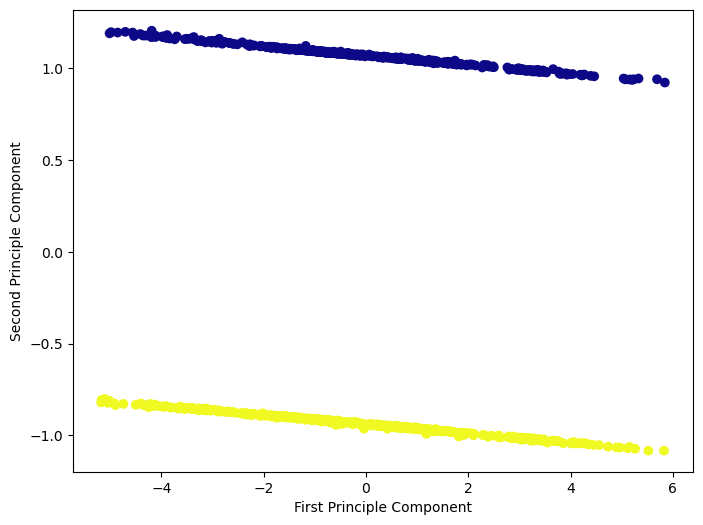

In [37]:
plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0],x_pca[:,1],c=df['Target'],cmap='plasma')
plt.xlabel('First Principle Component')
plt.ylabel('Second Principle Component')

In [38]:
pca.components_

array([[ 4.47171163e-01,  4.47389238e-01,  4.47360681e-01,
         4.47468078e-01,  4.45976280e-01, -2.50343708e-02],
       [ 3.33280834e-03,  7.19737490e-04,  2.01732334e-03,
         1.08557346e-03, -6.31977229e-02, -9.97992572e-01]])

In [39]:
df1=pd.DataFrame(scaled_data, columns=col)

In [40]:
df1

,Open,High,Low,Close,Tommorow,Target
0,-0.623213,-0.667795,-0.624218,-0.669021,-0.666325,0.936991
1,-0.661365,-0.701635,-0.632259,-0.664836,-0.670397,-1.067246
2,-0.652313,-0.695513,-0.618129,-0.668917,-0.640558,0.936991
3,-0.664389,-0.688130,-0.616178,-0.639011,-0.611703,0.936991
4,-0.631798,-0.656269,-0.576911,-0.610092,-0.596318,0.936991
...,...,...,...,...,...,...
949,2.334779,2.355881,2.346836,2.367328,2.247903,-1.067246
950,2.385443,2.366835,2.287525,2.255929,2.283472,0.936991
951,2.308215,2.278226,2.330953,2.291577,2.255404,-1.067246
952,2.309244,2.265595,2.210194,2.263447,2.241013,-1.067246


# KNN

K nearest neighbors algorithm

In [41]:
from sklearn.model_selection import train_test_split

X=df1
y=df['Target']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=100)

In [55]:
from sklearn.neighbors import KNeighborsClassifier

knn=KNeighborsClassifier(n_neighbors=5)

In [56]:
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [57]:
pred=knn.predict(X_test)

In [58]:
error_rate=[]
for i in range (1,100):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i=knn.predict(X_test)
    error_rate.append(np.mean(pred_i!=y_test))

Text(0, 0.5, 'Error Rate')

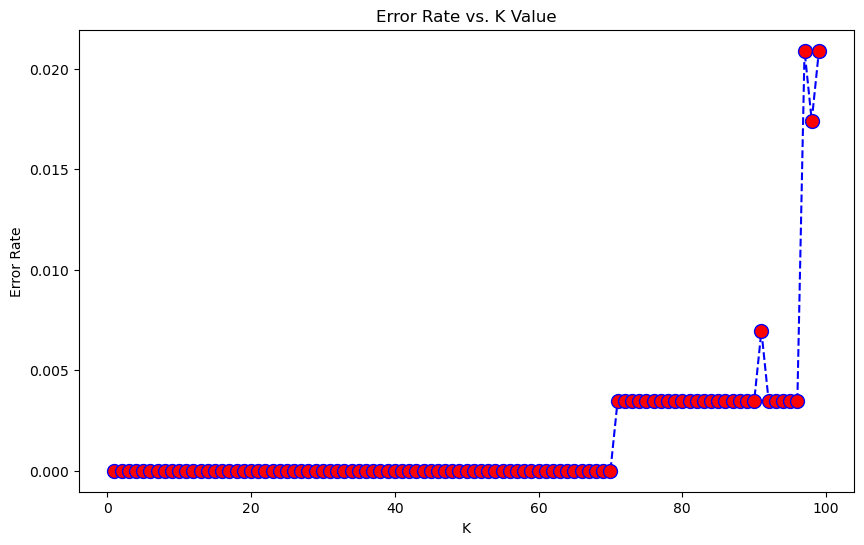

In [59]:
plt.figure(figsize= (10,6))
plt.plot(range(1,100), error_rate, color='blue', linestyle='dashed', marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [48]:
print("We can see that the error rate is lowest at 0-70")

We can see that the error rate is lowest at 0-70


In [54]:
MSE1=np.sqrt(np.mean(np.power((np.array(y_test)-np.array(pred)),2)))
print("The MSE with K=5 is", MSE1)

The MSE with K=5 is 0.0


In [60]:
knn=KNeighborsClassifier(n_neighbors=70)
knn.fit(X_train,y_train)
pred1=knn.predict(X_test)

In [61]:
MSE2=np.sqrt(np.mean(np.power((np.array(y_test)-np.array(pred1)),2)))
print("The MSE with K=70 is", MSE2)

The MSE with K=70 is 0.0


In [62]:
knn=KNeighborsClassifier(n_neighbors=74)
knn.fit(X_train,y_train)
pred2=knn.predict(X_test)

In [63]:
MSE3=np.sqrt(np.mean(np.power((np.array(y_test)-np.array(pred2)),2)))
print("The MSE with K=74 is", MSE3)

The MSE with K=74 is 0.059028133610095526


In [66]:
knn=KNeighborsClassifier(n_neighbors=91)
knn.fit(X_train,y_train)
pred3=knn.predict(X_test)

In [67]:
MSE4=np.sqrt(np.mean(np.power((np.array(y_test)-np.array(pred3)),2)))
print("The MSE with K=91 is", MSE4)

The MSE with K=91 is 0.08347838711296822


<AxesSubplot:xlabel='Target', ylabel='Density'>

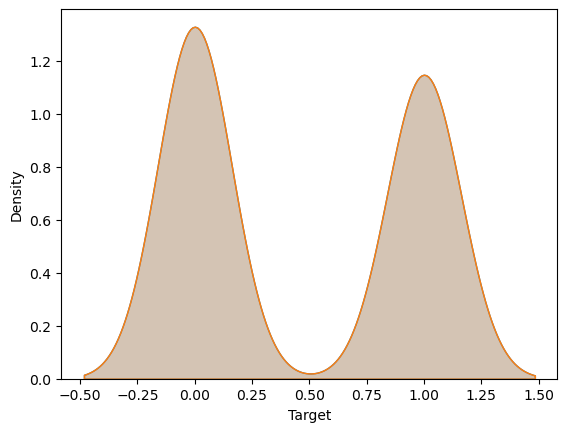

In [68]:
sns.kdeplot(y_test, shade=True)
sns.kdeplot(pred, shade=True)

In [70]:
cut=int(len(X)*0.8)
X_train=X[:cut]
X_test=X[cut:]
y_train=y[:cut]
y_test=y[cut:]
(X_test,y_test)

(         Open      High       Low     Close  Tommorow    Target
 763  0.501398  0.939316  0.544957  0.944847  1.184031  0.936991
 764  1.044456  1.219868  1.100340  1.189670  1.285680  0.936991
 765  1.245357  1.273086  1.189301  1.291548  1.407181  0.936991
 766  1.243964  1.378272  1.236401  1.413321  1.471355  0.936991
 767  1.469703  1.628596  1.507401  1.477639  1.539560  0.936991
 ..        ...       ...       ...       ...       ...       ...
 949  2.334779  2.355881  2.346836  2.367328  2.247903 -1.067246
 950  2.385443  2.366835  2.287525  2.255929  2.283472  0.936991
 951  2.308215  2.278226  2.330953  2.291577  2.255404 -1.067246
 952  2.309244  2.265595  2.210194  2.263447  2.241013 -1.067246
 953  2.276777  2.241970  2.270625  2.249023  2.169410 -1.067246
 
 [191 rows x 6 columns],
 763    1
 764    1
 765    1
 766    1
 767    1
       ..
 949    0
 950    1
 951    0
 952    0
 953    0
 Name: Target, Length: 191, dtype: int64)

### Euclidean distances method to get an accurate prediction as well as to help us graph the prediction

In [71]:
from sklearn.metrics.pairwise import euclidean_distances 
ed= euclidean_distances(X_test, X_train)
ed

array([[3.35304581, 3.93414859, 3.36003609, ..., 1.09486655, 1.1758833 ,
        0.75136569],
       [4.07229106, 4.57015292, 4.08235045, ..., 1.65796609, 1.85589121,
        1.44635655],
       [4.32327192, 4.79728276, 4.33358825, ..., 1.90065087, 2.10931288,
        1.68864104],
       ...,
       [6.87924072, 6.6165917 , 6.89006622, ..., 4.60524074, 4.81055891,
        4.43153185],
       [6.80491946, 6.53908723, 6.81597875, ..., 4.53343061, 4.73916195,
        4.35953637],
       [6.76979603, 6.50225379, 6.78089475, ..., 4.50153342, 4.70773074,
        4.3346168 ]])

In [72]:
euclidean_distances(X_test[1:2],X_train[2:3])[0][0]

4.082350447248095

In [73]:
print(X_test.shape)
print(X_train.shape)
print(ed.shape)

(191, 6)
(763, 6)
(191, 763)


In [87]:
def value(x_train, test_r, y_test, n_neighbors):
    distances = []
    for i in range (len (x_train)):
        dist = euclidean_distances ([test_r], [x_train[i]] )[0][0]
        distances.append((i, dist))
        distances.sort(key=lambda tup: tup[1])
        v= 0
    for i in range(n_neighbors):
        v += y_test[distances [i][0]]
    return v/n_neighbors

In [90]:
pred=[]
for i in X_test.values:
    pred.append(value(X_train.values,i,y_train, 2))
    
pred

[1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 0.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 0.0,
 0.0,
 1.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 0.0,
 0.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 0.0,
 1.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 0.0,
 0.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0

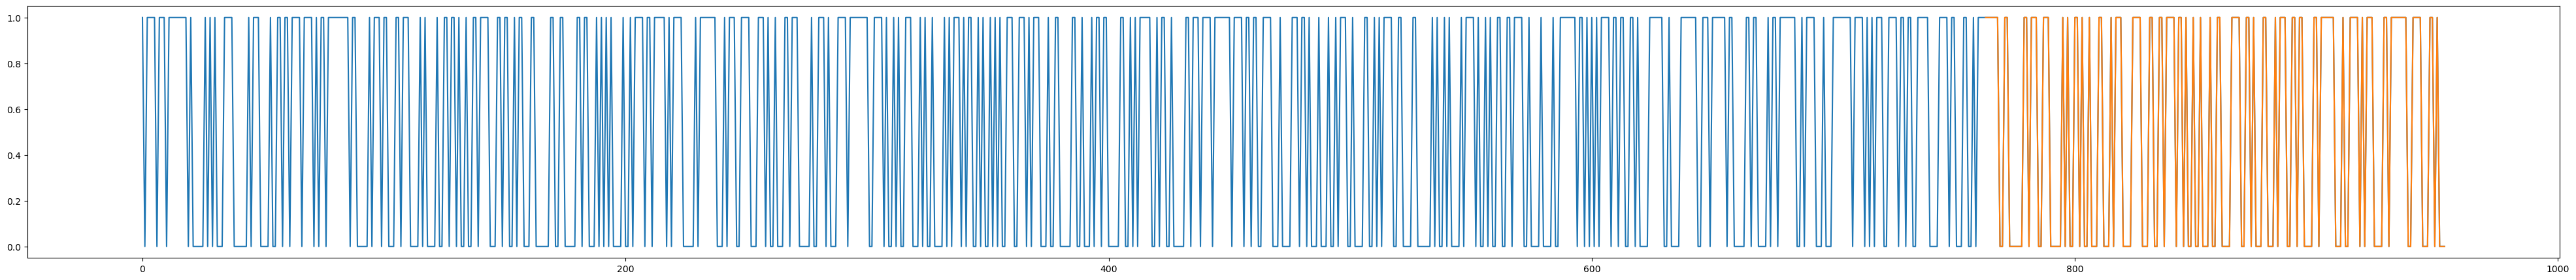

In [92]:
plt.figure(figsize= (50, 5))
plt.plot(y)
plt.plot(y_test.index, pred)
plt.show ( )

### When the orange line is at 1, that means the closing price will be greater than the day before and when it is at 0, it means it will be lower than the previous day

# Precision and Accuracy of the prediction model

In [96]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [97]:
print(confusion_matrix(y_test,pred))

[[93  0]
 [ 0 98]]


In [99]:
print("Test data report")
print(classification_report(y_test,pred))

Test data report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        93
           1       1.00      1.00      1.00        98

    accuracy                           1.00       191
   macro avg       1.00      1.00      1.00       191
weighted avg       1.00      1.00      1.00       191



In [101]:
accuracy = accuracy_score(y_test,pred)
print('Test Accuracy:', accuracy)

Test Accuracy: 1.0
